
#  Hand-written digit recognition
## Using Multinomial Logistic Regression


In this session we will see how multinomial Logistic regression can be used to recognize images of hand-written digits.

The necessary training data for this purpose is `digits` dataset available in the datasets module of Scikit-Learn.


In [1]:
import matplotlib.pyplot as plt

# Load the digits dataset from datasets module
from sklearn import datasets
digits = datasets.load_digits()

Before proceeding, lets see the description of the dataset

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
X = digits.data
Y = digits.target
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


In [4]:
print("Feature Set:\n",X[0])
print("Output: ", Y[0])

Feature Set:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Output:  0


The features can be visualized using 'images' attribute of the digits data set.

In [5]:
digits.images.shape

(1797, 8, 8)

Note that the 'images' attribute contains the same 64 features arranged in 8 x 8 matrix

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

We can visualize the image represented in an 8 x 8 matrix using the `imshow` function of pyplot module.

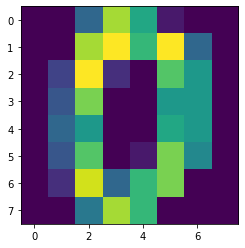

In [7]:
plt.imshow(digits.images[0])
plt.show()

Next, we split the data into `training set` and `test set`, and train the `LogisticRegression` classifier using the training set.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state = 87779 )
from sklearn.linear_model import LogisticRegression
# The instantiation given below uses the default solver lbfgs, recommended for small datasets
LogReg = LogisticRegression(multi_class = "multinomial", penalty="none") 
LogReg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty='none')

Note the use of `multi_class` argument which is set to `multinomial` while instantiating the classifier.

Also, the `penalty` argument is set to none, so that regularization is not applied. 

In [9]:
from sklearn import metrics
import numpy as np
y_pred = LogReg.predict(X_test)
print('Accuracy = %0.4f'%np.mean(y_pred == y_test))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Accuracy = 0.9512
Confusion matrix:
[[56  1  0  0  0  1  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  2  2]
 [ 0  2 58  0  0  0  0  0  0  0]
 [ 0  0  1 48  0  1  0  0  3  1]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  1  0  1 60  0  0  0  0]
 [ 0  0  0  0  0  0 58  0  1  0]
 [ 0  0  0  0  1  1  0 63  1  1]
 [ 0  3  0  0  0  1  0  0 49  2]
 [ 0  0  0  0  0  1  0  0  1 59]]
